In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving biological.csv to biological.csv
Saving biomass.csv to biomass.csv
Saving trash.csv to trash.csv
Saving solar.csv to solar.csv


biomass

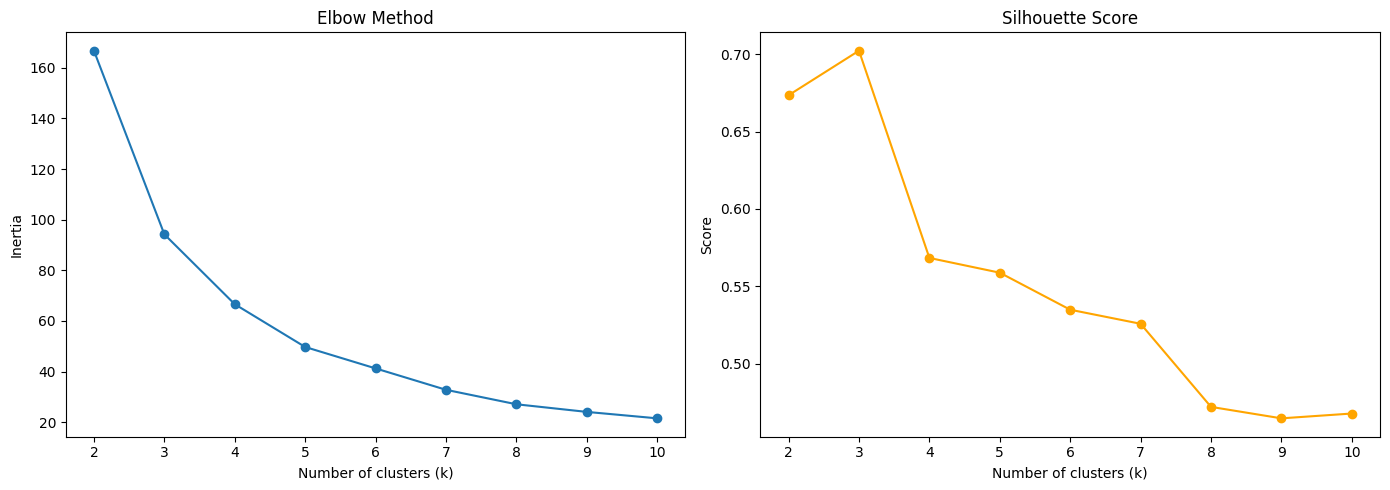

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("biomass.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled, kmeans.labels_))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

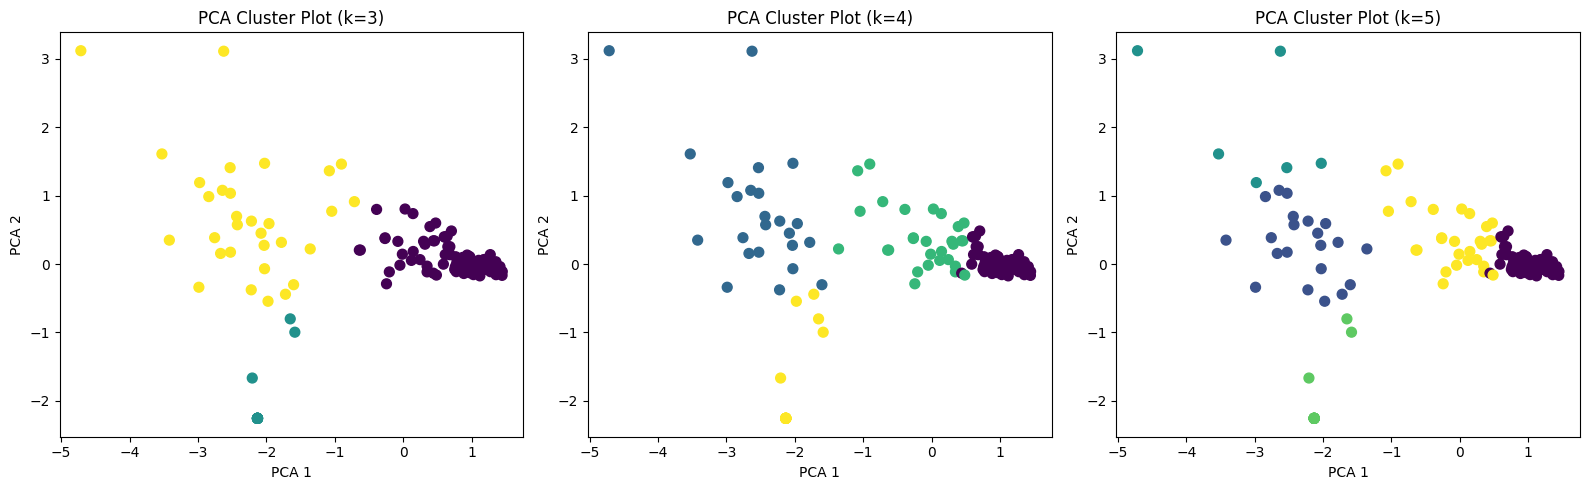

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("biomass.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

k_values = [3, 4, 5]
plt.figure(figsize=(16, 5))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(X)

    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title(f"PCA Cluster Plot (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()



---



trash

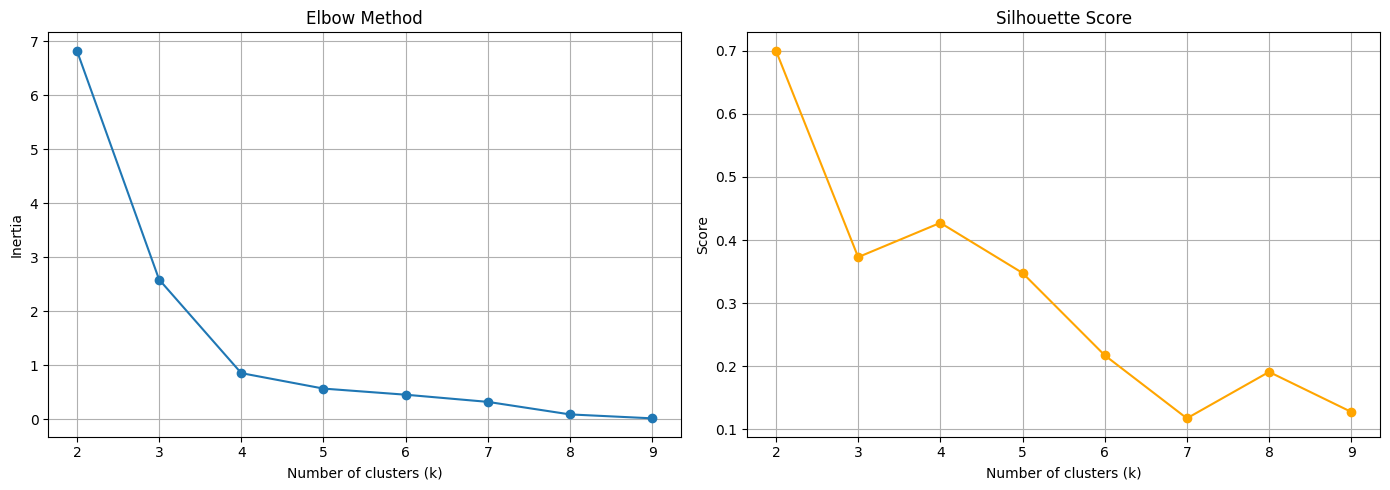

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("trash.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    if k < len(df):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled)
        inertias.append(kmeans.inertia_)
        score = silhouette_score(scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        break
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 2 + len(inertias)), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 2 + len(silhouette_scores)), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

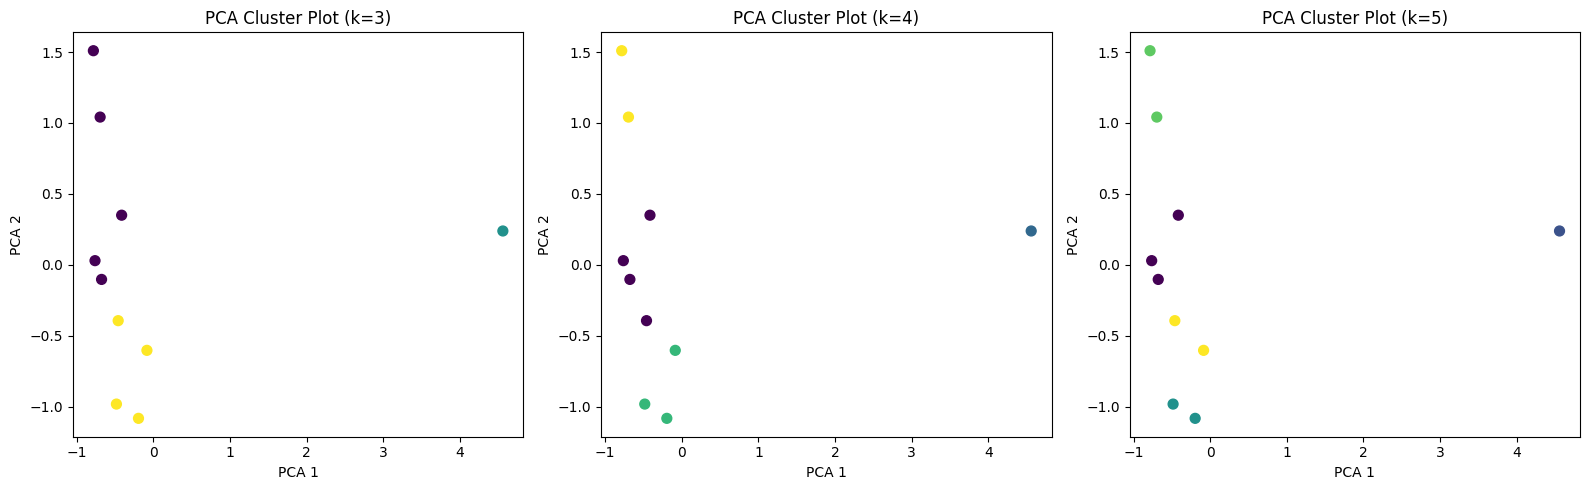

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("trash.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

k_values = [3, 4,5]
plt.figure(figsize=(16, 5))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(X)

    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title(f"PCA Cluster Plot (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

    if k == 3:
        df['cluster'] = cluster_labels

plt.tight_layout()
plt.show()



---



solar

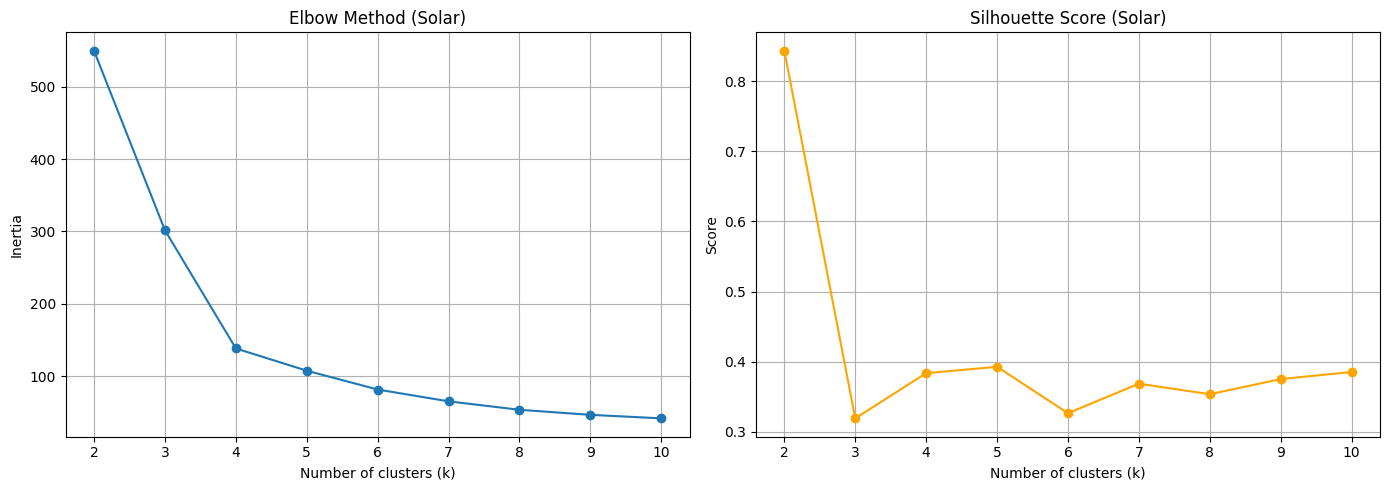

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("solar.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)

scaler = StandardScaler()
scaled = scaler.fit_transform(features)

inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    if k < len(df):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled, kmeans.labels_))
    else:
        break

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 2 + len(inertias)), inertias, marker='o')
plt.title('Elbow Method (Solar)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 2 + len(silhouette_scores)), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score (Solar)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

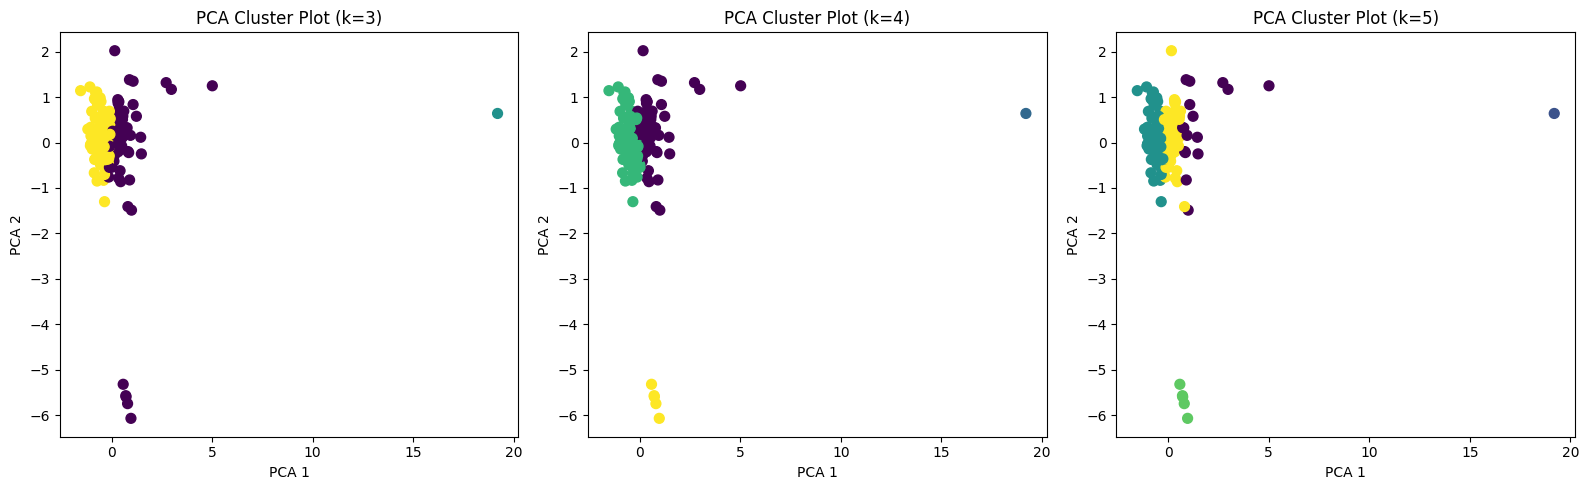

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("solar.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

k_values = [3, 4,5]
plt.figure(figsize=(16, 5))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(X)

    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title(f"PCA Cluster Plot (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    if k == 3:
        df['cluster'] = cluster_labels

plt.tight_layout()
plt.show()



---



**biological**

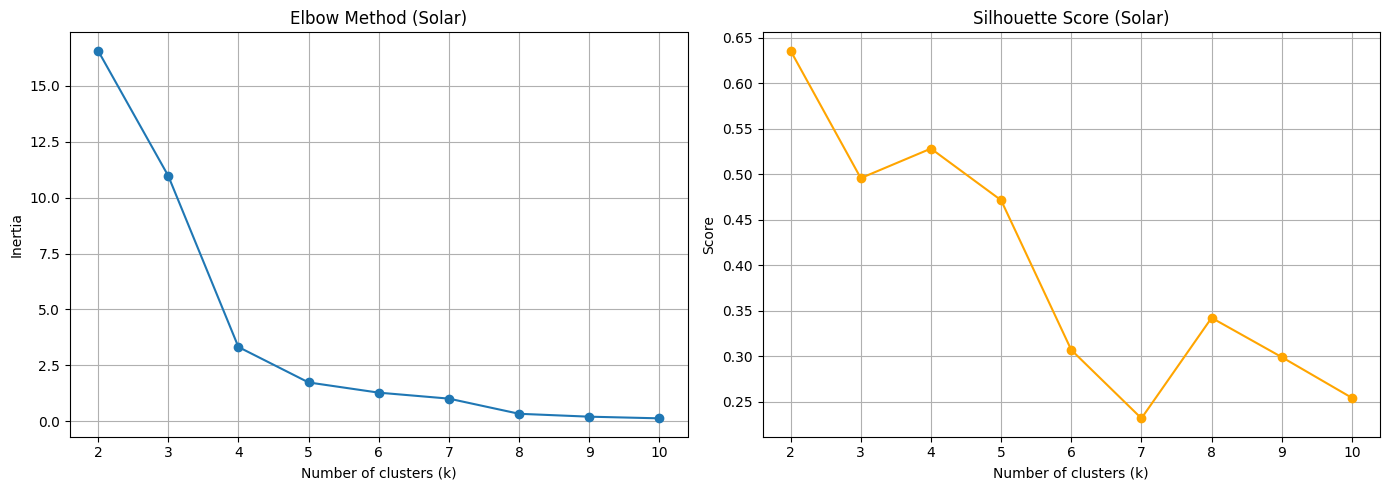

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("biological.csv")
features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

inertias = []
silhouette_scores = []
valid_k = []

for k in range(2, 11):
    if k < len(df):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled, kmeans.labels_))
        valid_k.append(k)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(valid_k, inertias, marker='o')
plt.title('Elbow Method (Solar)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(valid_k, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score (Solar)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

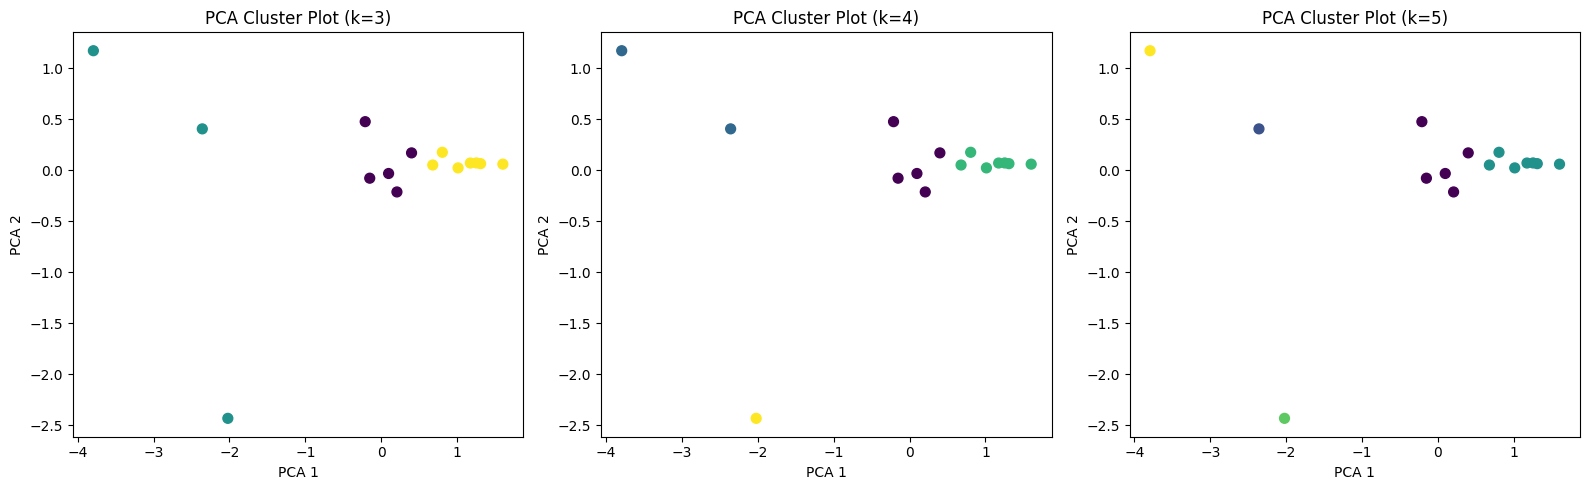

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv("biological.csv")

features = df[['AVG_EFF', 'CV', 'missing_rate_kWH']].fillna(0)
scaler = StandardScaler()
X = scaler.fit_transform(features)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
k_values = [3, 4, 5]
plt.figure(figsize=(16, 5))

for i, k in enumerate(k_values):
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(X)
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
    plt.title(f"PCA Cluster Plot (k={k})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    if k == 3:
        df['cluster'] = cluster_labels

plt.tight_layout()
plt.show()